The dataset provided is a one and half years of representative customer's data from Santander bank spanning 2015-01-28 to 2016-06-28. 

The goal is to determine what 
i) Segment customers belong to
ii) products NEW customers will get from the bank in the period 2016-05-28 to 2016-06-28. 

#### Let us first load the modules and data required to understand the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'bankMadridNew.csv', low_memory=False )
np.random.seed(1001) 
print("Dimensions of the dataset" , df.shape)

Dimensions of the dataset (190455, 48)


The columns are in Spanish we will rename columns for ease of understanding.

In [2]:
df.columns = ['Partition_id','customer_code','employee_index','customer_residence','customer_gender','customer_age','first_contract_date','new_customer_index','customer_seniority','customer_type','last_date_as_primary_customer','customer_type_month_beg','customer_relation_type','residence_index','foreigner_index','spouse_index','channel_used','deceased_index','address_type','province_code','province_name','activity_type','gross_income','segmentation','saving_Account','guarantees','current_Accounts','derivative_account','payroll_Account','junior_Account','joint_account','individual_Account','individual_Plus','short_term','medium_term','long_term','e_account','Funds','Mortgage','Pensions','Loans','Taxes','credit_Card','securities','home_Account','payroll','Pensions_2','direct_Debit']
df.head()

,Partition_id,customer_code,employee_index,customer_residence,customer_gender,customer_age,first_contract_date,new_customer_index,customer_seniority,customer_type,...,Mortgage,Pensions,Loans,Taxes,credit_Card,securities,home_Account,payroll,Pensions_2,direct_Debit
0,2015-01-28,1042509,N,ES,V,20,2012-08-03,1.0,3,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1014660,N,ES,H,32,2012-05-07,1.0,4,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1132935,N,ES,V,38,2013-05-03,1.0,2,1.0,...,0,0,0,0,0,0,0,NaN,NaN,0
3,2015-01-28,1110925,N,ES,V,29,2012-12-10,1.0,5,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1118340,N,ES,V,31,2013-01-17,1.0,3,1.0,...,0,0,0,0,0,0,0,NaN,NaN,0


### Missing Values check
The number of rows is quite large around 190k. We will assess if there are missing values and if they can be removed. 

In [3]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
4,customer_gender,12
45,payroll,41
46,Pensions_2,41
11,customer_type_month_beg,27711
12,customer_relation_type,27711
23,segmentation,31507
16,channel_used,31599
22,gross_income,132357
10,last_date_as_primary_customer,187746
15,spouse_index,190391


#### Remove rows with null values 
Based on the values above, we remove rows where gross_income, channel_used, segmentation, customer_relation_type, customer_type_month_beg, pensions_2 and customer_gender is null. Living and local customers will be included in our analysis.

In [4]:
dMadridNewCustomer = df[~df['gross_income'].isnull()] #Only rows where there is gross income
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['channel_used'].isnull()] #Only rows where there is channel used
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['segmentation'].isnull()] #Only rows where there is segementation data
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_relation_type'].isnull()] # Only accounts with customer_relation_type data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_type_month_beg'].isnull()] # Only accounts with customer_type_month_beg data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['payroll'].isnull()] # Only accounts with payroll data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['Pensions_2'].isnull()] # Only accounts with payroll data filled
dMadridNewCustomer = dMadridNewCustomer[~dMadridNewCustomer['customer_gender'].isnull()] #Only rows where there is segementation data

# Only Living customers
dMadridNewCustomer = dMadridNewCustomer[dMadridNewCustomer['deceased_index'] == 'N']
# Only locals
dMadridNewCustomer = dMadridNewCustomer[dMadridNewCustomer['foreigner_index'] == 'N']
dMadridNewCustomer.shape

(47968, 48)

## Remove data where is no value in the following columns
These columns indicate all the available accounts to the customer. 

In [5]:
dMadridNewCustomer = dMadridNewCustomer[~((dMadridNewCustomer['current_Accounts']==0) & (dMadridNewCustomer['derivative_account']==0) 
                    & (dMadridNewCustomer['payroll_Account']==0) & (dMadridNewCustomer['junior_Account']==0)
                    & (dMadridNewCustomer['joint_account']==0) & (dMadridNewCustomer['individual_Account']==0)
                    & (dMadridNewCustomer['individual_Plus']==0) & (dMadridNewCustomer['short_term']==0)
                    & (dMadridNewCustomer['medium_term']==0) & (dMadridNewCustomer['long_term']==0)
                    & (dMadridNewCustomer['e_account']==0) & (dMadridNewCustomer['Funds']==0)
                    & (dMadridNewCustomer['Mortgage']==0) & (dMadridNewCustomer['Pensions']==0)
                    & (dMadridNewCustomer['Taxes']==0) & (dMadridNewCustomer['credit_Card']==0)
                    & (dMadridNewCustomer['securities']==0) & (dMadridNewCustomer['payroll']==0)
                    & (dMadridNewCustomer['Pensions_2']==0) & (dMadridNewCustomer['direct_Debit']==0))
                   ]

#### Get an understanding of the data types

In [6]:
dtype_df = dMadridNewCustomer.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,25
1,float64,8
2,object,15


#### Integer Columns Analysis

In [7]:
unique_values_dict = {}
for col in dMadridNewCustomer.columns:
    if col in dtype_df[dtype_df['Column Type'] != 'object']['Count'].values:
        unique_value = str(dMadridNewCustomer[col].unique().tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Column:",columns ," containing the unique values : ", unique_val)
    print("--------------------------------------------------")
# customer_gender varón o hembra

Column: ['customer_code']  containing the unique values :  [1042509, 1014660, 1110925, 885751, 1265863, 1253148, 1365964, 1339579, 1327604, 1326497, 1216048, 1245452, 1250566, 1237715, 1195171, 294949, 297062, 401314, 399296, 352387, 83966, 46609, 180903, 138547, 686306, 731928, 670744, 754339, 809665, 485405, 575636, 605562, 522550, 523733, 562340, 517741, 535614, 525304, 522957, 527090, 598127, 622250, 616552, 619201, 617289, 579459, 582195, 570079, 571393, 593121, 594116, 596212, 451352, 444052, 455885, 419840, 505811, 466706, 484623, 478763, 806636, 793212, 818091, 810199, 759310, 759508, 759507, 787496, 786754, 785822, 782933, 863902, 884807, 834668, 835920, 836238, 664089, 663594, 669662, 658507, 662661, 660087, 681127, 680548, 641506, 650219, 650318, 656001, 647070, 731708, 752077, 740419, 693597, 693819, 690622, 721232, 705001, 149230, 128878, 120238, 139698, 132830, 191427, 215048, 214597, 178489, 178651, 53093, 61508, 16254, 34119, 105558, 76614, 91600, 351267, 359710, 361702

There are columns with one unique value, we can exclude from our modeling step. They are 'customer_code','new_customer_index','address_type','province_code'

In [10]:
dAnalysis = dMadridNewCustomer.drop(['customer_code','new_customer_index','address_type','province_code'
                                     ,'saving_Account', 'guarantees', 'Loans', 'home_Account'], 1) 

#### Categorical Columns Analysis

In [9]:
unique_values_dict = {}
for col in dAnalysis.columns:
    if col in dtype_df[dtype_df['Column Type'] == 'object']['Count'].values:
        unique_value = str(dMadridNewCustomer[col].unique().tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Column:",columns ," containing the unique values : ",unique_val)
    print("--------------------------------------------------")

Column: ['Partition_id']  containing the unique values :  ['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28', '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']
--------------------------------------------------
Column: ['employee_index', 'foreigner_index', 'deceased_index']  containing the unique values :  ['N']
--------------------------------------------------
Column: ['customer_residence']  containing the unique values :  ['ES']
--------------------------------------------------
Column: ['customer_gender']  containing the unique values :  ['V', 'H']
--------------------------------------------------
Column: ['first_contract_date']  containing the unique values :  ['2012-08-03', '2012-05-07', '2012-12-10', '2010-07-13', '2014-06-27', '2014-04-10', '2014-12-04', '2014-10-23', '2014-10-09', '2014-10-07', '2013-11-07', '2014-02-25', '2014-03-26', '2014

#### Remove categorial columns where there is only a single value or system indexes

In [11]:
# This is a system column is used within the database and is not required for analysis
# customer_residence, residence_index is a single value which just states S or Spain Customer's Country residence
# province_name has only madrid 
# Spouse is nan
# Only live and local customers 
# Remove date columns
dAnalysis = dAnalysis.drop(['Partition_id', 'employee_index', 'foreigner_index', 'deceased_index'
                            ,'customer_residence','residence_index','spouse_index','province_name'
                           ,'first_contract_date','last_date_as_primary_customer'], 1) # Dates

### Count the number of loan accounts each customer holds

In [12]:
dAnalysis['loans'] = dAnalysis.apply(lambda row: row.Mortgage + row.credit_Card + row.direct_Debit  + row.Taxes 
                                         + row.derivative_account + row.securities, axis=1)

### Count the number of savings account each customer holds

In [13]:
dAnalysis['savings'] = dAnalysis.apply (lambda row: row.payroll_Account
                                            + row.junior_Account + row.joint_account + row.individual_Account 
                                            + row.individual_Plus + row.short_term + row.medium_term + row.long_term 
                                            + row.e_account + row.Funds + row.Pensions 
                                            + row.payroll + row.Pensions_2   , axis=1)

### Data Understanding of accounts held by the customer
#### Savings accounts

Number of customers with Savings Account
 0.0    23380
1.0    10719
2.0     1274
3.0     1691
4.0      294
5.0       30
Name: savings, dtype: int64


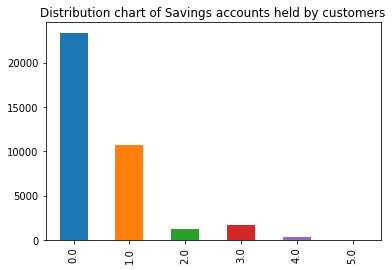

In [14]:
dAnalysis['savings'].value_counts().sort_index().plot(kind='bar', title='Distribution chart of Savings accounts held by customers')
print("Number of customers with Savings Account\n", dAnalysis['savings'].value_counts().sort_index())

#### Create a column to indicate if a customer has savings accounts or not. 0: No savings account, 1: Has savings accounts

In [15]:
dAnalysis['savings_N'] = dAnalysis['savings'].apply(lambda x: 1 if x > 0 else 0)
dAnalysis['savings_N'].value_counts().sort_index()

0    23380
1    14008
Name: savings_N, dtype: int64

#### Loan Accounts

Number of customers with Loan Account
 0    31153
1     5819
2      386
3       30
Name: loans, dtype: int64


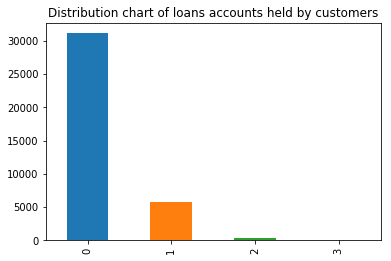

In [16]:
dAnalysis['loans'].value_counts().plot(kind='bar', title='Distribution chart of loans accounts held by customers')
print("Number of customers with Loan Account\n", dAnalysis['loans'].value_counts().sort_index())

#### Create a column to indicate if a customer has Loan accounts or not. 0: No loan account, 1: Has loan accounts

In [17]:
dAnalysis['loans_N'] = dAnalysis['loans'].apply(lambda x: 1 if x > 0 else 0)
dAnalysis['loans_N'].value_counts().sort_index()

0    31153
1     6235
Name: loans_N, dtype: int64

#### Current Account

Number of customers with Current Account
 0     8498
1    28890
Name: current_Accounts, dtype: int64


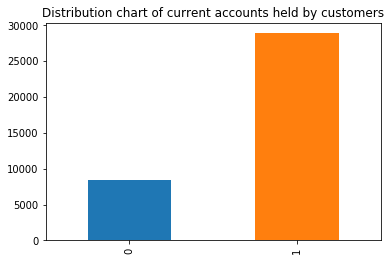

In [18]:
dAnalysis['current_Accounts'].value_counts().sort_index().plot(kind='bar', title='Distribution chart of current accounts held by customers')
print("Number of customers with Current Account\n", dAnalysis['current_Accounts'].value_counts().sort_index())

### Check for the distribution of accounts

### Create the class labels

In [21]:
dAccountsType = dAnalysis.groupby(['savings_N','loans_N','current_Accounts']).count() # ,'investments'
dAnalysis['account_label'] = dAnalysis.apply(lambda row: row.savings_N * 4 + row.loans_N * 2 + row.current_Accounts, axis=1 )
dAnalysis['account_label'].value_counts().sort_index()

1    18902
2      188
3     4290
4     7136
5     5115
6     1174
7      583
Name: account_label, dtype: int64

### As the dataset is imbalanced there are a lot less loan accounts as compared to Savings  and Current Account , under sampling will be performed 
We want to keep all the accounts which are for loans only and it will represent 10% of the entire dataset. Therefore we should have 188 / 0.1 = 1880 records in total

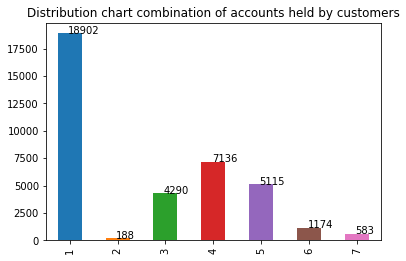

In [22]:
# Proportion of accounts in the undersampled dataset
ax = dAnalysis['account_label'].value_counts().sort_index().plot(kind='bar', title='Distribution chart combination of accounts held by customers')

x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [23]:
investment_index = dAnalysis[(dAnalysis.account_label != 2)].index
investmentSample = dAnalysis.loc[investment_index]
investmentSample.shape

(37200, 35)

We will randomly select other observations

In [24]:
sample_size = 1692
np.random.seed(188) 
random_indices = np.random.choice(investment_index, sample_size, replace=False)
otherSample = dAnalysis.loc[random_indices]
otherSample.shape

(1692, 35)

In [25]:
underSample = pd.concat( [otherSample, dAnalysis[dAnalysis.account_label== 2]], ignore_index = True)
underSample.shape

(1880, 35)

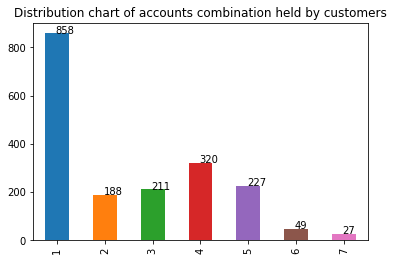

In [27]:
# Proportion of accounts in the undersampled dataset
ax = underSample['account_label'].value_counts().sort_index().plot(kind='bar', title='Distribution chart of accounts combination held by customers')

x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

# Data Modeling

### Lets now setup the basic SVM classifier

In [28]:
import itertools
def analyze(clf, data, classLabel):
    """
    Analyze how well a classifier performs on data.

    Parameters
    ----------
    clf : classifier object
    data : dict
    """
    # Get confusion matrix
    from sklearn import metrics
    predicted = clf.predict(data['test']['X'])
    cnf_matrix = metrics.confusion_matrix(data['test']['y'], predicted)
    
    # Get classification report
    from sklearn.metrics import classification_report
    print("classification_report matrix:\n%s" % classification_report(data['test']['y'], predicted, target_names=classLabel))

    # Get Roc curves
#    from sklearn.metrics import roc_auc_score
#    print("ROC AUC: %0.4f" % roc_auc_score(data['test']['y'], predicted))
    
    print("Accuracy: %0.4f" % metrics.accuracy_score(data['test']['y'],
                                                     predicted))
    print("Confusion matrix:\n%s" %  metrics.confusion_matrix(data['test']['y'], predicted))
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes= classLabel, title='Confusion matrix, without normalization')

    
             
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

## Baseline Approach

The training to test set ratio will be set to 70% to 30%

In [29]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import preprocessing
#Training Set
underSample_scaled = underSample.drop([
    #'customer_age', 'customer_type','activity_type', 'customer_seniority', 'customer_type_month_beg' , 'segmentation', 'customer_relation_type' , 'gross_income'
    'channel_used',
    'current_Accounts', 'derivative_account', 'payroll_Account', 'junior_Account'
                            ,'joint_account','individual_Account','individual_Plus','short_term','medium_term','long_term'
                           ,'e_account', 'Funds', 'Mortgage', 'Pensions','Taxes' , 'credit_Card','securities','payroll'
                          ,'Pensions_2','direct_Debit', 'loans','savings','savings_N','loans_N'                           
                          ], 1) 

dTest = dAnalysis.drop([
    #'customer_age', 'customer_type','activity_type', 'customer_seniority', 'customer_type_month_beg' , 'segmentation', 'customer_relation_type' , 'gross_income'
    'channel_used',
                            'current_Accounts', 'derivative_account', 'payroll_Account', 'junior_Account'
                            ,'joint_account','individual_Account','individual_Plus','short_term','medium_term','long_term'
                           ,'e_account', 'Funds', 'Mortgage', 'Pensions','Taxes' , 'credit_Card','securities','payroll'
                          ,'Pensions_2','direct_Debit', 'loans','savings','savings_N','loans_N'                           
                          ], 1) 
underSample_scaled['gross_income'] = preprocessing.scale(underSample_scaled['gross_income'])
dTest['gross_income'] = preprocessing.scale(dTest['gross_income'])

#### One hot encoding is required for gender, segmentation, customer_relation_type, channel_used, customer_type_month_beg

In [30]:
cf = underSample_scaled.select_dtypes(include=['object']).columns.values.tolist()
cf

['customer_gender',
 'customer_type_month_beg',
 'customer_relation_type',
 'segmentation']

In [31]:
# make one-hot-encoding convenient way - pandas.get_dummies(df) function
dummies = pd.get_dummies(
    underSample_scaled[cf],
    drop_first = False # you can set it = True to ommit multicollinearity (crucial for linear models)
)

print('oh-encoded shape: {}'.format(dummies.shape))

# get rid of old columns and append them encoded
underSample_scaled = pd.concat(
    [
        underSample_scaled.drop(cf, axis=1), # drop old
        dummies # append them one-hot-encoded
    ],
    axis=1 # column-wise
)

print('appended-encoded shape: {}'.format(underSample_scaled.shape))

oh-encoded shape: (1880, 11)
appended-encoded shape: (1880, 17)


In [32]:
# make one-hot-encoding convenient way - pandas.get_dummies(df) function
dummies = pd.get_dummies(
    dTest[cf],
    drop_first = False # you can set it = True to ommit multicollinearity (crucial for linear models)
)

print('oh-encoded shape: {}'.format(dummies.shape))

# get rid of old columns and append them encoded
dTest = pd.concat(
    [
        dTest.drop(cf, axis=1), # drop old
        dummies # append them one-hot-encoded
    ],
    axis=1 # column-wise
)

print('appended-encoded shape: {}'.format(dTest.shape))

oh-encoded shape: (37388, 11)
appended-encoded shape: (37388, 17)


In [33]:
from sklearn.model_selection import train_test_split
accountLabels = ['C1',  'C2',  'C3',  'C4', 'C5', 'C6', 'C7']

#Undersampled dataset
X_train = underSample_scaled
y_train = underSample_scaled.account_label

testSize = 0.3
OriX_train, X_test, Oriy_train, y_test = train_test_split(dTest, dTest.account_label
                                                          , test_size= testSize)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


dataAccount = {'train': {'X': X_train,
                          'y': y_train},
                'test': {'X': X_test,
                         'y': y_test}}

(1880, 17) (1880,)
(11217, 17) (11217,)


In [34]:
inputSummary = X_train.describe()
inputSummary.transpose()

,count,mean,std,min,25%,50%,75%,max
customer_age,1880.0,3.994202e+01,16.642225,2.000000,28.000000,38.000000,49.000000,95.000000
customer_seniority,1880.0,3.548936e+00,1.377516,0.000000,3.000000,4.000000,5.000000,6.000000
customer_type,1880.0,1.260638e+00,5.048582,1.000000,1.000000,1.000000,1.000000,99.000000
activity_type,1880.0,8.510638e-01,0.356120,0.000000,1.000000,1.000000,1.000000,1.000000
gross_income,1880.0,1.818876e-17,1.000266,-0.394246,-0.228645,-0.108337,0.075109,30.293564
account_label,1880.0,2.534574e+00,1.681656,1.000000,1.000000,2.000000,4.000000,7.000000
customer_gender_H,1880.0,4.500000e-01,0.497626,0.000000,0.000000,0.000000,1.000000,1.000000
customer_gender_V,1880.0,5.500000e-01,0.497626,0.000000,0.000000,1.000000,1.000000,1.000000
customer_type_month_beg_1,1880.0,4.367021e-01,0.496109,0.000000,0.000000,0.000000,1.000000,1.000000
customer_type_month_beg_1.0,1880.0,5.627660e-01,0.496177,0.000000,0.000000,1.000000,1.000000,1.000000


In [35]:
# Linear SVM - One vs All
ovrLin = LinearSVC(C=1,multi_class='ovr', penalty='l2', random_state=8)

# One vs Rest - RBF kernel
ovoRBF = SVC(C=1.0, kernel='rbf', gamma='auto', probability = False, shrinking=True,
             tol=0.001, class_weight=None, max_iter=-1, decision_function_shape='ovr',   
             random_state=None, verbose=False)

# One vs Rest - Polynomial kernel
ovoPoly = SVC(C=1.0, kernel='poly', gamma='auto', coef0=0, probability = False
              , shrinking=True, tol=0.001, class_weight=None, max_iter=-1
              , decision_function_shape='ovr',  random_state=None, verbose=False)

### Fit the models

In [36]:
ovrLin.fit(X_train,y_train) #Fit to the LinearSVC model
ovoRBF.fit(X_train,y_train)
ovoPoly.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Confusion matrix for one vs all Linear SVM 

classification_report matrix:
             precision    recall  f1-score   support

         C1       1.00      0.96      0.98      5729
         C2       0.01      1.00      0.03        64
         C3       0.37      0.01      0.02      1277
         C4       0.83      0.15      0.25      2150
         C5       0.58      0.04      0.07      1477
         C6       0.98      0.12      0.21       345
         C7       0.85      0.97      0.91       175

avg / total       0.83      0.55      0.58     11217

Accuracy: 0.5471
Confusion matrix:
[[5472  256    0    0    0    0    1]
 [   0   64    0    0    0    0    0]
 [   0 1260   14    3    0    0    0]
 [   0 1815   15  319    0    0    1]
 [   0 1357    9   51   57    1    2]
 [   0  227    0   11   41   41   25]
 [   0    5    0    0    0    0  170]]
Confusion matrix, without normalization


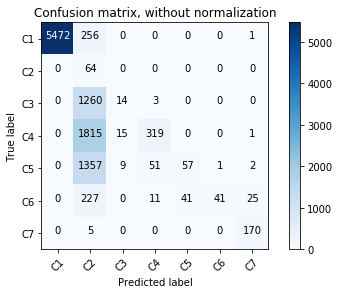

In [37]:
analyze(ovrLin,dataAccount, accountLabels)

### Confusion matrix for One vs One SVM RBF kernal

classification_report matrix:
             precision    recall  f1-score   support

         C1       1.00      1.00      1.00      5729
         C2       0.74      0.98      0.85        64
         C3       0.99      0.91      0.95      1277
         C4       0.93      0.98      0.96      2150
         C5       0.82      0.96      0.88      1477
         C6       0.45      0.25      0.32       345
         C7       0.97      0.18      0.30       175

avg / total       0.94      0.94      0.94     11217

Accuracy: 0.9445
Confusion matrix:
[[5719    4    0    6    0    0    0]
 [   1   63    0    0    0    0    0]
 [   0   18 1166   93    0    0    0]
 [   0    0   13 2117   20    0    0]
 [   0    0    0   63 1414    0    0]
 [   0    0    0    1  258   85    1]
 [   0    0    0    2   37  105   31]]
Confusion matrix, without normalization


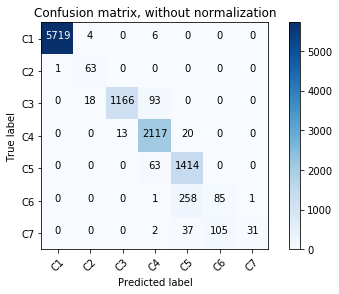

In [38]:
analyze(ovoRBF,dataAccount, accountLabels)

### Confusion matrix for One vs One SVM Polynomial kernal

classification_report matrix:
             precision    recall  f1-score   support

         C1       1.00      1.00      1.00      5729
         C2       0.88      1.00      0.93        64
         C3       1.00      0.99      1.00      1277
         C4       1.00      1.00      1.00      2150
         C5       1.00      1.00      1.00      1477
         C6       0.99      0.98      0.99       345
         C7       0.99      0.98      0.99       175

avg / total       1.00      1.00      1.00     11217

Accuracy: 0.9979
Confusion matrix:
[[5729    0    0    0    0    0    0]
 [   0   64    0    0    0    0    0]
 [   0    8 1268    1    0    0    0]
 [   0    1    0 2149    0    0    0]
 [   0    0    2    2 1473    0    0]
 [   0    0    0    5    1  338    1]
 [   0    0    0    0    0    3  172]]
Confusion matrix, without normalization


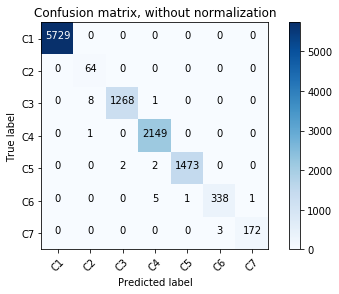

In [39]:
analyze(ovoPoly,dataAccount, accountLabels)

Based on the confusion matrix it looks like the SVM with polynomial kernel is the best performing model for identifying the accounts which a customer will hold. 

# Proposed approach
For linear SVC we will use dual = False to indicate we are to solve for the primal optimization problem. 

In [40]:
# One vs All
ovrLin = LinearSVC(C=10,multi_class='ovr', penalty='l2',class_weight=None, random_state=8
                  , dual = False)

classification_report matrix:
             precision    recall  f1-score   support

         C1       1.00      1.00      1.00      5729
         C2       0.30      0.59      0.40        64
         C3       0.72      0.42      0.53      1277
         C4       0.56      0.74      0.64      2150
         C5       0.62      0.64      0.63      1477
         C6       0.92      0.14      0.24       345
         C7       1.00      0.99      0.99       175

avg / total       0.83      0.81      0.80     11217

Accuracy: 0.8091
Confusion matrix:
[[5729    0    0    0    0    0    0]
 [   0   38   18    8    0    0    0]
 [   0   27  540  708    2    0    0]
 [   0   61  193 1599  297    0    0]
 [   0    1    4  518  950    4    0]
 [   0    0    0    5  293   47    0]
 [   0    0    0    0    2    0  173]]
Confusion matrix, without normalization


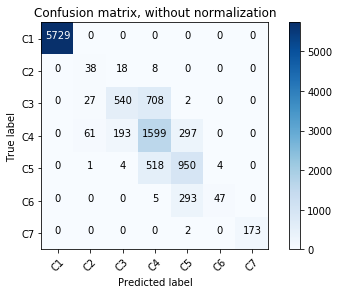

In [41]:
ovrLin.fit(X_train,y_train) #Fit to the LinearSVC model
analyze(ovrLin,dataAccount, accountLabels)

There is a marked improvement in accuracy after solving for the max optimization issue

classification_report matrix:
             precision    recall  f1-score   support

         C1       1.00      1.00      1.00      5729
         C2       0.89      1.00      0.94        64
         C3       1.00      0.99      1.00      1277
         C4       1.00      1.00      1.00      2150
         C5       0.98      1.00      0.99      1477
         C6       0.99      0.90      0.95       345
         C7       0.93      0.96      0.95       175

avg / total       1.00      1.00      1.00     11217

Accuracy: 0.9951
Confusion matrix:
[[5726    3    0    0    0    0    0]
 [   0   64    0    0    0    0    0]
 [   0    3 1268    6    0    0    0]
 [   1    0    0 2149    0    0    0]
 [   1    0    0    1 1475    0    0]
 [   0    0    0    0   21  312   12]
 [   0    2    0    0    3    2  168]]
Confusion matrix, without normalization


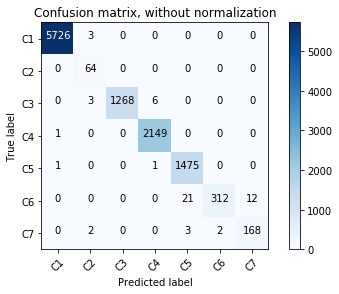

In [45]:
# One vs Rest - RBF kernel
ovoRBF = SVC(C=10.0, kernel='rbf', gamma=.01, probability = False, shrinking=True,
             tol=0.001, class_weight=None, max_iter=-1, decision_function_shape='ovr',   
             random_state=None, verbose=False)

ovoRBF.fit(X_train,y_train)
analyze(ovoRBF,dataAccount, accountLabels)